In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.preprocessing import PolynomialFeatures
from imblearn.over_sampling import SMOTE
import pickle, joblib

In [2]:
df = pd.read_csv('kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
df.rename(columns={'bp': 'blood_pressure', 'sg': 'specific gravity','al':'albumin','su':'sugar','rbc':'red blood cells',
                     'pc':'pus cell','pcc':'pus cell clumps','ba':'bacteria','bgr':'blood glucose random','bu':'blood urea',
                     'sc':'serum creatinine','sod':'sodium','pot':'potassium','hemo':'hemoglobin','pcv':'packed cell volume',
                     'wc':'white blood cell count','rc':'red blood cell count','htn':'hypertension','dm':'diabetes mellitus',
                     'cad':'coronary artery disease','appet':'appetite','pe':'pedal edema','ane':'anemia','classification':'classes'},inplace=True)
df.head()

,id,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,classes
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
num = df.select_dtypes(include = 'number')
cat = df.select_dtypes(exclude = 'number')

display(num.head())
display(cat.head())

,id,age,blood_pressure,specific gravity,albumin,sugar,blood glucose random,blood urea,serum creatinine,sodium,potassium,hemoglobin
0,0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4
1,1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3
2,2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,NaN,NaN,9.6
3,3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2
4,4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6


,red blood cells,pus cell,pus cell clumps,bacteria,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,classes
0,NaN,normal,notpresent,notpresent,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,NaN,normal,notpresent,notpresent,38,6000,NaN,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,35,7300,4.6,no,no,no,good,no,no,ckd


In [5]:
def converter(df):
    df= pd.to_numeric(df, errors = 'coerce')
    return df

df['packed cell volume'] = converter(df['packed cell volume'])
df['white blood cell count'] = converter(df['white blood cell count'])
df['red blood cell count'] = converter(df['red blood cell count'])

In [6]:
num = df.select_dtypes(include = 'number')
cat = df.select_dtypes(exclude = 'number')

display(num.head())
display(cat.head())

,id,age,blood_pressure,specific gravity,albumin,sugar,blood glucose random,blood urea,serum creatinine,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,red blood cell count
0,0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2
1,1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN
2,2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN
3,3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9
4,4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6


,red blood cells,pus cell,pus cell clumps,bacteria,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,classes
0,NaN,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,NaN,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd


<h1><b>Data preprocessing

In [7]:
df = df.copy()

from sklearn.preprocessing import LabelEncoder
label_encode = LabelEncoder()

for i in cat:
    if i in df:
        df[i] = label_encode.fit_transform(df[i])
df

,id,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,classes
0,0,48.0,80.0,1.020,1.0,0.0,2,1,0,0,...,44.0,7800.0,5.2,1,4,1,0,0,0,0
1,1,7.0,50.0,1.020,4.0,0.0,2,1,0,0,...,38.0,6000.0,NaN,0,3,1,0,0,0,0
2,2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,...,31.0,7500.0,NaN,0,4,1,1,0,1,0
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,32.0,6700.0,3.9,1,3,1,1,1,1,0
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,...,35.0,7300.0,4.6,0,3,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,...,47.0,6700.0,4.9,0,3,1,0,0,0,2
396,396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,...,54.0,7800.0,6.2,0,3,1,0,0,0,2
397,397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,...,49.0,6600.0,5.4,0,3,1,0,0,0,2
398,398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,...,51.0,7200.0,5.9,0,3,1,0,0,0,2


<h1><b>Feature Selection

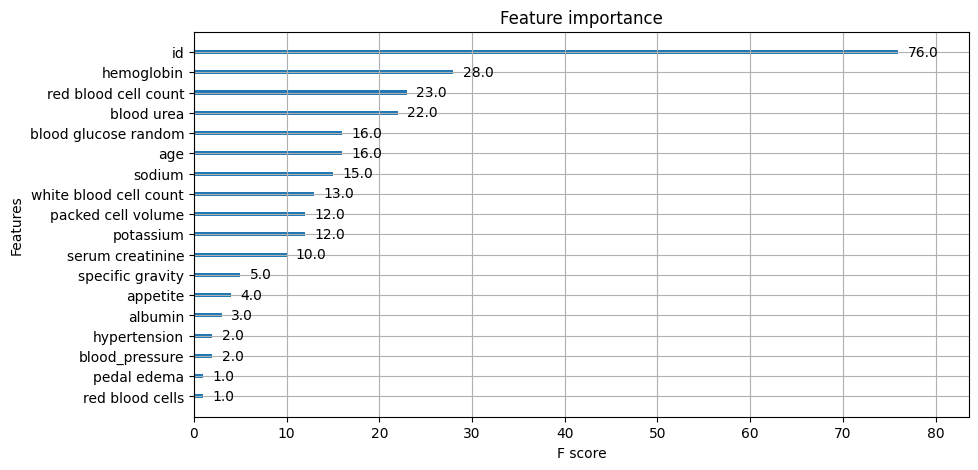

In [12]:
# - Using XGBOOST to find feature importance
import xgboost as xgb
model = xgb.XGBClassifier()

x = df.drop('classes', axis = 1)
y = df.classes

model.fit(x, y)

plt.rcParams['figure.figsize'] = (10, 5)
# Print feature importance scores
xgb.plot_importance(model, importance_type= 'weight')
plt.show()

In [13]:
sel_cols = ['hemoglobin', 'red blood cell count', 'blood urea', 'blood glucose random', 'age', 'sodium', 'white blood cell count', 'classes']
sel_data = df[sel_cols]
sel_data

,hemoglobin,red blood cell count,blood urea,blood glucose random,age,sodium,white blood cell count,classes
0,15.4,5.2,36.0,121.0,48.0,NaN,7800.0,0
1,11.3,NaN,18.0,NaN,7.0,NaN,6000.0,0
2,9.6,NaN,53.0,423.0,62.0,NaN,7500.0,0
3,11.2,3.9,56.0,117.0,48.0,111.0,6700.0,0
4,11.6,4.6,26.0,106.0,51.0,NaN,7300.0,0
...,...,...,...,...,...,...,...,...
395,15.7,4.9,49.0,140.0,55.0,150.0,6700.0,2
396,16.5,6.2,31.0,75.0,42.0,141.0,7800.0,2
397,15.8,5.4,26.0,100.0,12.0,137.0,6600.0,2
398,14.2,5.9,50.0,114.0,17.0,135.0,7200.0,2


In [14]:
sel_data.dropna(inplace = True)
sel_data.shape

(219, 8)

<Axes: xlabel='classes', ylabel='count'>

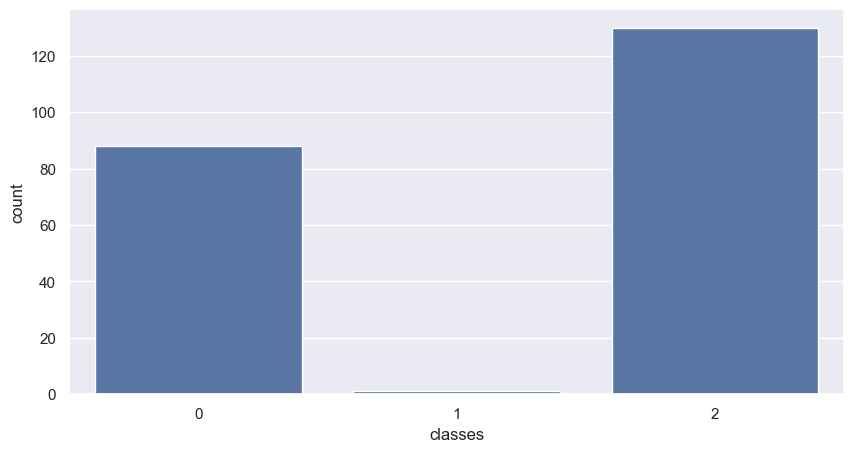

In [15]:
sns.set(style = 'darkgrid')
sns.countplot(x = sel_data.classes)

<Axes: xlabel='classes', ylabel='count'>

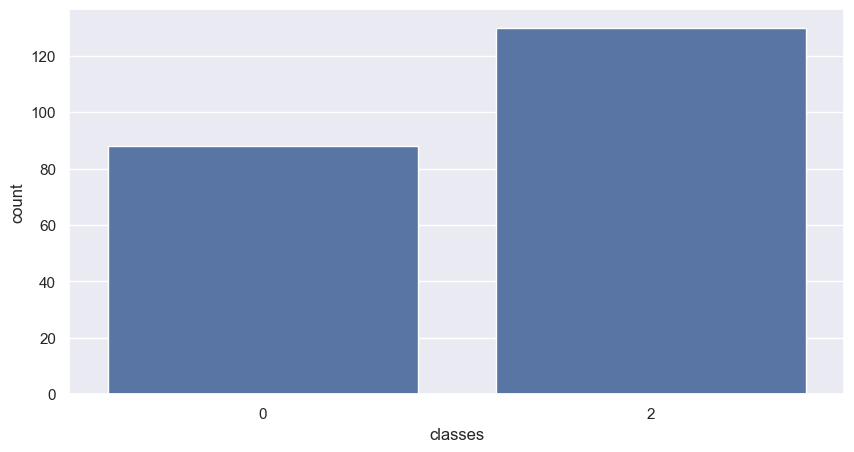

In [16]:
sel_data = sel_data.loc[sel_data['classes'] != 1]
sns.countplot(x = sel_data.classes)

In [17]:
# Split Into Train and Test
x = sel_data.drop('classes', axis = 1)
y = sel_data.classes

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 98, stratify = y)

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf_model = RandomForestClassifier()

rf_model.fit(xtrain, ytrain)
cross_val = print(classification_report(rf_model.predict(xtrain), ytrain))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           2       1.00      1.00      1.00       104

    accuracy                           1.00       174
   macro avg       1.00      1.00      1.00       174
weighted avg       1.00      1.00      1.00       174



In [19]:
print(classification_report(rf_model.predict(xtest), ytest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        26

    accuracy                           1.00        44
   macro avg       1.00      1.00      1.00        44
weighted avg       1.00      1.00      1.00        44



In [33]:
# serialise transformers and model
import joblib

joblib.dump(label_encode, 'encoder.pkl')
joblib.dump(rf_model, 'kidneydisease_model.pkl')

['kidneydisease_model.pkl']

In [37]:
# new patients data to predict the classes of their kidney disease
new_patients = df.sample(10).drop('classes', axis = 1)
new_patients

,id,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,...,hemoglobin,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia
129,129,75.0,70.0,1.025,1.0,0.0,2,1,0,0,...,11.1,NaN,NaN,NaN,1,3,1,1,1,0
290,290,54.0,70.0,1.020,0.0,0.0,2,2,2,2,...,14.8,52.0,8400.0,5.9,0,3,1,0,0,0
329,329,33.0,60.0,1.025,0.0,0.0,1,1,0,0,...,14.1,48.0,7800.0,5.1,0,3,1,0,0,0
210,210,59.0,100.0,1.015,4.0,2.0,1,1,0,0,...,7.3,20.0,9800.0,3.9,1,4,2,0,0,1
289,289,42.0,70.0,1.020,0.0,0.0,1,1,0,0,...,16.6,43.0,7100.0,5.3,0,3,1,0,0,0
227,227,57.0,80.0,1.015,0.0,0.0,2,1,0,0,...,11.3,36.0,7200.0,3.8,1,4,1,0,0,0
209,209,19.0,70.0,1.020,0.0,0.0,2,1,0,0,...,11.5,NaN,6900.0,NaN,0,3,1,0,0,0
339,339,25.0,70.0,1.020,0.0,0.0,1,1,0,0,...,13.3,48.0,7000.0,4.9,0,3,1,0,0,0
352,352,37.0,60.0,1.020,0.0,0.0,1,1,0,0,...,15.0,48.0,7000.0,5.2,0,3,1,0,0,0
138,138,73.0,NaN,1.010,1.0,0.0,2,2,0,0,...,NaN,NaN,NaN,NaN,0,0,1,0,0,0


In [38]:
new_patients = new_patients[sel_cols[:-1]]
new_patients.dropna(inplace = True)
new_patients

,hemoglobin,red blood cell count,blood urea,blood glucose random,age,sodium,white blood cell count
290,14.8,5.9,28.0,76.0,54.0,146.0,8400.0
329,14.1,5.1,25.0,80.0,33.0,146.0,7800.0
210,7.3,3.9,132.0,255.0,59.0,135.0,9800.0
289,16.6,5.3,32.0,93.0,42.0,143.0,7100.0
339,13.3,4.9,42.0,88.0,25.0,136.0,7000.0
352,15.0,5.2,47.0,109.0,37.0,141.0,7000.0


In [39]:
import joblib
imported_model = joblib.load('kidneydisease_model.pkl')
imported_model

RandomForestClassifier()

In [40]:
imported_model.predict(new_patients)

array([2, 2, 0, 2, 2, 2])

In [41]:
df.iloc[290]['classes']

2.0

In [42]:
df.iloc[329]['classes']

2.0

In [43]:
df.iloc[210]['classes']

0.0

In [44]:
df.iloc[289]['classes']

2.0

In [45]:
df.iloc[339]['classes']

2.0

In [46]:
df.iloc[352]['classes']

2.0